# Do Interictal DischargesAffect Functional Connectivity

author: Jeni Stiso (jeni.stiso@gmail.com)

words

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
import palettable

%matplotlib inline
sns.set_context('poster')
sns.set_style("whitegrid")

In [2]:
sns.__version__

'0.9.0'

In [3]:
# directories - point this at you RAM data
RAM_dir = '/Volumes/bassett-data/Jeni/RAM/'

# load data
net_data = pd.read_csv(RAM_dir + 'group_analysis/network_stats.csv', index_col=0)
node_data = pd.read_csv(RAM_dir + 'group_analysis/node_stats.csv', index_col=0)

Check the data

In [4]:
net_data.head(10)

band_measure  n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
1         alpha_aec   570      0.648336      0.135151               NaN   
2         alpha_coh   570      0.626959      0.094427               NaN   
3         alpha_plv   570      0.213882     -0.087954               NaN   
4          beta_aec   570      0.875216      0.180452               NaN   
5          beta_coh   570      0.163715      0.054780               NaN   
6          beta_plv   570     -1.138546     -0.154879               NaN   
7      broadband_ar   570     -0.715286     -0.092667               NaN   
8   broadband_xcorr   570     -0.486451     -0.021101               NaN   
9         gamma_aec   570      1.239014      0.256066               NaN   
10        gamma_coh   570      0.403368      0.013829               NaN   

    str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
1                NaN                   NaN            0.180405   
2                NaN                   NaN            0.051322   
3                NaN                   NaN           -0.042537   
4                NaN                   NaN            0.141704   
5                NaN                   NaN            0.063884   
6                NaN                   NaN           -0.071218   
7                NaN                   NaN            0.052486   
8                NaN                   NaN           -0.151263   
9                NaN                   NaN            0.328934   
10               NaN                   NaN            0.053464   

    str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
1                    NaN            1.059622                0.519196   
2                    NaN            0.483469                0.519078   
3                    NaN            0.127317                0.261437   
4                    NaN            0.913605                0.811270   
5                    NaN            0.096051                0.101761   
6                    NaN           -0.750382               -1.130355   
7                    NaN            0.064525               -0.853360   
8                    NaN           -0.573730               -0.409479   
9                    NaN            1.575662                1.055238   
10                   NaN            0.145889                0.495864   

   fc_measure  str_not_spike_beta_num       band    subj hand  age gender  \
1         aec                0.112451      alpha  R1125T    R   44      F   
2         coh                0.073481      alpha  R1125T    R   44      F   
3         plv               -0.086353      alpha  R1125T    R   44      F   
4         aec                0.180703       beta  R1125T    R   44      F   
5         coh                0.026922       beta  R1125T    R   44      F   
6         plv               -0.167759       beta  R1125T    R   44      F   
7          ar               -0.123980  broadband  R1125T    R   44      F   
8       xcorr                0.009903  broadband  R1125T    R   44      F   
9         aec                0.222751      gamma  R1125T    R   44      F   
10        coh                0.016265      gamma  R1125T    R   44      F   

    race  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0  
6    1.0  
7    1.0  
8    1.0  
9    1.0  
10   1.0

In [5]:
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 1 to 1664
Data columns (total 19 columns):
band_measure              1664 non-null object
n_tp                      1664 non-null int64
str_beta_bin              1664 non-null float64
str_beta_num              1664 non-null float64
str_soz_beta_bin          1328 non-null float64
str_soz_beta_num          1328 non-null float64
str_not_soz_beta_num      1326 non-null float64
str_spike_beta_num        1328 non-null float64
str_not_soz_beta_bin      1326 non-null float64
str_spike_beta_bin        1328 non-null float64
str_not_spike_beta_bin    1322 non-null float64
fc_measure                1664 non-null object
str_not_spike_beta_num    1322 non-null float64
band                      1664 non-null object
subj                      1664 non-null object
hand                      1664 non-null object
age                       1664 non-null int64
gender                    1664 non-null object
race                      1648 non-null

In [6]:
net_data.describe()

n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
count  1664.000000   1664.000000   1664.000000       1328.000000   
mean   1626.076923     -0.184645      0.093290         -0.197257   
std    1672.885475      0.749995      0.247224          0.696928   
min      16.000000     -5.232899     -1.048490         -4.558189   
25%     474.250000     -0.479568     -0.038351         -0.478303   
50%     888.000000     -0.119209      0.047071         -0.145915   
75%    2560.250000      0.143430      0.202246          0.112882   
max    7643.000000      5.722524      1.873725          3.042185   

       str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
count       1328.000000           1326.000000         1328.000000   
mean           0.115258              0.080758            0.121946   
std            0.250824              0.233458            0.250871   
min           -0.844078             -0.897521           -0.911446   
25%           -0.021040             -0.047765           -0.027716   
50%            0.063884              0.041492            0.080512   
75%            0.219568              0.188552            0.228222   
max            1.615755              1.563267            1.429678   

       str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
count           1326.000000         1328.000000             1322.000000   
mean              -0.156639           -0.207898               -0.174325   
std                0.675066            0.736454                0.707969   
min               -5.179452           -5.078618               -4.984745   
25%               -0.428875           -0.526282               -0.435222   
50%               -0.108155           -0.144880               -0.104016   
75%                0.135326            0.129208                0.162524   
max                5.506770            6.945647                3.369793   

       str_not_spike_beta_num          age         race  
count             1322.000000  1664.000000  1648.000000  
mean                 0.081814    35.471154     3.650485  
std                  0.248932    10.971746     0.932018  
min                 -0.891972    19.000000     1.000000  
25%                 -0.052012    25.750000     4.000000  
50%                  0.038168    34.000000     4.000000  
75%                  0.186193    45.000000     4.000000  
max                  1.863835    60.000000     4.000000

In [7]:
node_data.head(10)

elec     band_measure  n_tp  elec_spike  elec_in_soz  str_soz_beta_bin  \
1   LA1        alpha_aec   570    0.007018            0               NaN   
2   LA1        alpha_coh   570    0.007018            0               NaN   
3   LA1        alpha_plv   570    0.007018            0               NaN   
4   LA1         beta_aec   570    0.007018            0               NaN   
5   LA1         beta_coh   570    0.007018            0               NaN   
6   LA1         beta_plv   570    0.007018            0               NaN   
7   LA1     broadband_ar   570    0.007018            0               NaN   
8   LA1  broadband_xcorr   570    0.007018            0               NaN   
9   LA1        gamma_aec   570    0.007018            0               NaN   
10  LA1        gamma_coh   570    0.007018            0               NaN   

    str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
1                    NaN            0.980031                     NaN   
2                    NaN            0.313891                     NaN   
3                    NaN           -0.270748                     NaN   
4                    NaN            0.774691                     NaN   
5                    NaN           -0.179115                     NaN   
6                    NaN           -0.069222                     NaN   
7                    NaN            0.053858               -1.042323   
8                    NaN           -0.563032               -0.347179   
9                    NaN            1.037692                     NaN   
10                   NaN            0.389708                     NaN   

    str_beta_bin  ...        band  region        x        y          z  \
1       0.980031  ...       alpha     NaN -15.1555 -8.98665 -21.584432   
2       0.313891  ...       alpha     NaN -15.1555 -8.98665 -21.584432   
3      -0.270748  ...       alpha     NaN -15.1555 -8.98665 -21.584432   
4       0.774691  ...        beta     NaN -15.1555 -8.98665 -21.584432   
5      -0.179115  ...        beta     NaN -15.1555 -8.98665 -21.584432   
6      -0.069222  ...        beta     NaN -15.1555 -8.98665 -21.584432   
7      -0.929648  ...   broadband     NaN -15.1555 -8.98665 -21.584432   
8      -0.426029  ...   broadband     NaN -15.1555 -8.98665 -21.584432   
9       1.037692  ...       gamma     NaN -15.1555 -8.98665 -21.584432   
10      0.389708  ...       gamma     NaN -15.1555 -8.98665 -21.584432   

      subj hand age  gender  race  
1   R1125T    R  44       F   1.0  
2   R1125T    R  44       F   1.0  
3   R1125T    R  44       F   1.0  
4   R1125T    R  44       F   1.0  
5   R1125T    R  44       F   1.0  
6   R1125T    R  44       F   1.0  
7   R1125T    R  44       F   1.0  
8   R1125T    R  44       F   1.0  
9   R1125T    R  44       F   1.0  
10  R1125T    R  44       F   1.0  

[10 rows x 26 columns]

In [8]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167456 entries, 1 to 167456
Data columns (total 26 columns):
elec                      167456 non-null object
band_measure              167456 non-null object
n_tp                      167456 non-null int64
elec_spike                167456 non-null float64
elec_in_soz               167456 non-null int64
str_soz_beta_bin          133152 non-null float64
str_not_soz_beta_bin      122604 non-null float64
str_spike_beta_bin        133008 non-null float64
str_not_spike_beta_bin    117786 non-null float64
str_beta_bin              167328 non-null float64
str_soz_beta_num          133152 non-null float64
str_not_soz_beta_num      122604 non-null float64
str_spike_beta_num        133008 non-null float64
str_beta_num              167328 non-null float64
str_not_spike_beta_num    117786 non-null float64
fc_measure                167456 non-null object
band                      167456 non-null object
region                    153072 non-null objec

In [9]:
node_data.describe()

n_tp     elec_spike    elec_in_soz  str_soz_beta_bin  \
count  167456.000000  167456.000000  167456.000000     133152.000000   
mean     1526.998471       0.018895       0.070514         -0.094719   
std      1589.572555       0.043064       0.256012          0.689718   
min        12.000000       0.000000       0.000000        -15.183706   
25%       407.000000       0.000000       0.000000         -0.302129   
50%       882.000000       0.003122       0.000000         -0.057254   
75%      2299.000000       0.014742       0.000000          0.141820   
max      7643.000000       0.500000       1.000000         18.287573   

       str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
count         122604.000000       133008.000000           117786.000000   
mean              -0.123101           -0.103705               -0.133675   
std                0.707524            0.678639                0.723620   
min              -20.065925          -16.746394              -13.210344   
25%               -0.335353           -0.326873               -0.339887   
50%               -0.071489           -0.061375               -0.074122   
75%                0.133047            0.151227                0.139091   
max               22.721397           13.612025                9.271235   

        str_beta_bin  str_soz_beta_num  str_not_soz_beta_num  \
count  167328.000000     133152.000000         122604.000000   
mean       -0.129529          0.062186              0.078765   
std         0.824228          0.214853              0.228178   
min       -18.822651         -3.238945             -3.678946   
25%        -0.365052         -0.034920             -0.031663   
50%        -0.069568          0.034025              0.038030   
75%         0.154703          0.133667              0.152887   
max        22.947993          3.176791              3.864706   

       str_spike_beta_num   str_beta_num  str_not_spike_beta_num  \
count       133008.000000  167328.000000           117786.000000   
mean             0.069113       0.078837                0.079925   
std              0.222433       0.242799                0.246227   
min             -2.796049      -3.712994               -2.792913   
25%             -0.035069      -0.034903               -0.031329   
50%              0.036826       0.038572                0.038738   
75%              0.143037       0.158592                0.153873   
max              4.419972       3.709385                3.558722   

                   x              y              z            age  \
count  167456.000000  167456.000000  167456.000000  167456.000000   
mean       -6.711237      -6.357381       3.672808      35.728550   
std        48.972327      41.246392      52.004504      11.157206   
min      -165.993000    -143.909000    -402.070855      19.000000   
25%       -44.352500     -32.490000     -20.440480      26.000000   
50%       -11.797700      -8.368290       2.225001      34.000000   
75%        34.131600      15.592700      33.486764      47.000000   
max       173.816000     207.770000      91.013510      60.000000   

                race  
count  166240.000000  
mean        3.663908  
std         0.914876  
min         1.000000  
25%         4.000000  
50%         4.000000  
75%         4.000000  
max         4.000000

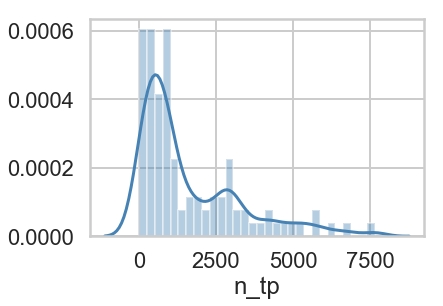

In [10]:
sns.distplot(net_data['n_tp'], bins=30, color='steelblue')

In [11]:
net_data.subj.nunique()

91

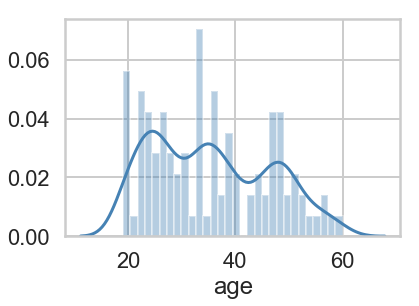

In [12]:
sns.distplot(net_data['age'], bins=30, color='steelblue')
mean_age = net_data['age'].mean()

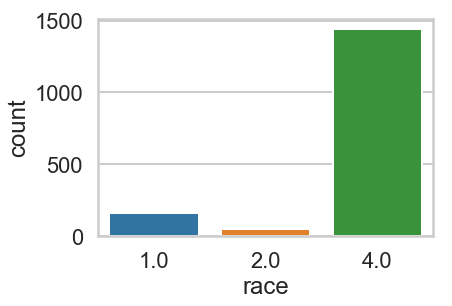

In [13]:
sns.countplot(data=net_data, x='race', )
mean_race = 4

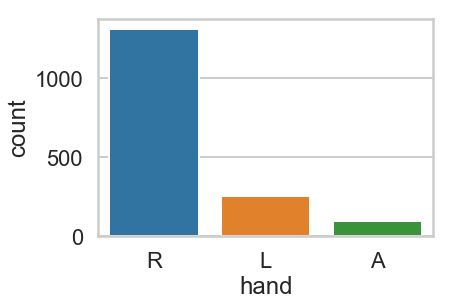

In [14]:
sns.countplot(data=net_data, x='hand', )
mean_hand = 'R'

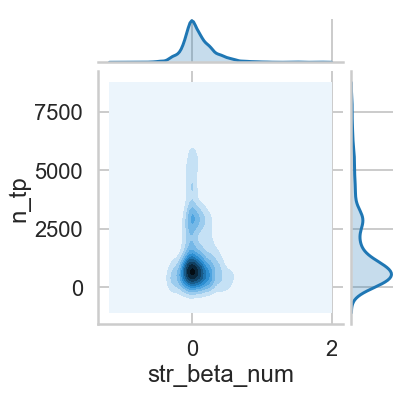

In [15]:
sns.jointplot(data=net_data, x='str_beta_num', y='n_tp', kind='kde' )

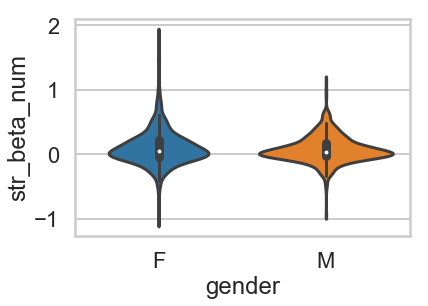

In [16]:
sns.violinplot(data=net_data, x='gender', y='str_beta_num', cut=True)

In [17]:
# add means for null values
net_data.loc[net_data['age'].isnull(), 'age'] = mean_age
net_data.loc[net_data['race'].isnull(), 'race'] = mean_race
net_data.loc[net_data['hand'].isnull(), 'hand'] = mean_hand

# same for node data
node_data.loc[node_data['age'].isnull(), 'age'] = mean_age
node_data.loc[node_data['race'].isnull(), 'race'] = mean_race
node_data.loc[node_data['hand'].isnull(), 'hand'] = mean_hand

In [18]:
net_data.dropna(inplace=True)
#net_data['soz'] = net_data['soz'].astype('category')
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 20 columns):
band_measure              0 non-null object
n_tp                      0 non-null int64
str_beta_bin              0 non-null float64
str_beta_num              0 non-null float64
str_soz_beta_bin          0 non-null float64
str_soz_beta_num          0 non-null float64
str_not_soz_beta_num      0 non-null float64
str_spike_beta_num        0 non-null float64
str_not_soz_beta_bin      0 non-null float64
str_spike_beta_bin        0 non-null float64
str_not_spike_beta_bin    0 non-null float64
fc_measure                0 non-null object
str_not_spike_beta_num    0 non-null float64
band                      0 non-null object
subj                      0 non-null object
hand                      0 non-null object
age                       0 non-null float64
gender                    0 non-null object
race                      0 non-null int64
soz                       0 non-null float64
dtypes: float64(1

In [197]:
net_data.dropna(inplace=True)
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209280 entries, 1 to 209280
Data columns (total 26 columns):
elec                      209280 non-null object
band_measure              209280 non-null object
n_tp                      209280 non-null int64
elec_spike                209280 non-null float64
elec_in_soz               209280 non-null int64
str_soz_beta_bin          207728 non-null float64
str_not_soz_beta_bin      192284 non-null float64
str_spike_beta_bin        208608 non-null float64
str_not_spike_beta_bin    171530 non-null float64
str_beta_bin              208608 non-null float64
str_soz_beta_num          207728 non-null float64
str_not_soz_beta_num      192284 non-null float64
str_spike_beta_num        208608 non-null float64
str_beta_num              208608 non-null float64
str_not_spike_beta_num    171530 non-null float64
fc_measure                209280 non-null object
band                      209280 non-null object
region                    192448 non-null objec

In [77]:
node_data.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2322 entries, 1 to 3672
Data columns (total 27 columns):
elec                      2322 non-null object
band_measure              2322 non-null object
n_tp                      2322 non-null int64
elec_spike                2322 non-null float64
elec_in_soz               2322 non-null int64
str_soz_beta_bin          2322 non-null float64
str_not_soz_beta_bin      2322 non-null float64
str_spike_beta_bin        2322 non-null float64
str_not_spike_beta_bin    2322 non-null float64
str_beta_bin              2322 non-null float64
str_soz_beta_num          2322 non-null float64
str_not_soz_beta_num      2322 non-null float64
str_spike_beta_num        2322 non-null float64
str_beta_num              2322 non-null float64
str_not_spike_beta_num    2322 non-null float64
fc_measure                2322 non-null object
band                      2322 non-null object
region                    2322 non-null object
x                         2322 non-nul

In [199]:
# save
net_data.to_csv('/Volumes/bassett-data/Jeni/RAM/group_analysis/net_data_clean.csv')

## Effects on Network Measures

test if intereictal spike regularly change network strength.

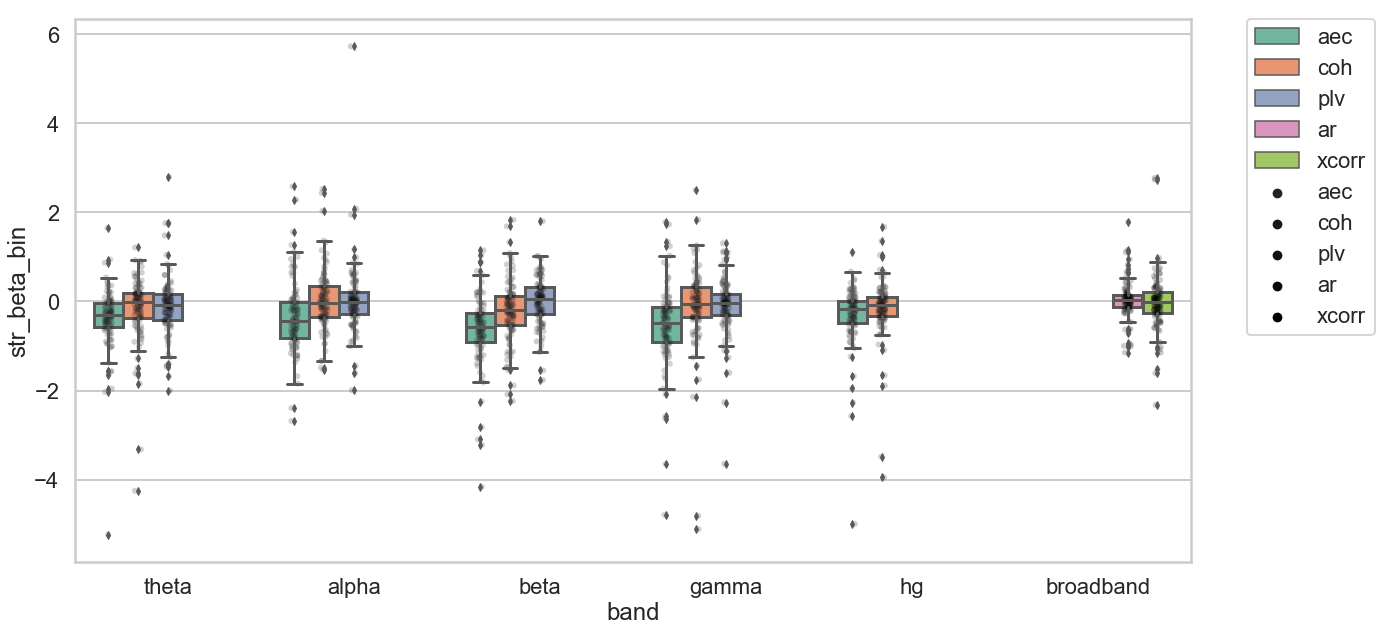

In [41]:
# color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')
    
plt.figure(figsize=(20,10))
sns.boxplot( data=net_data, x="band", y='str_beta_bin', hue='fc_measure', 
            order=['theta','alpha','beta','gamma','hg','broadband'])
sns.stripplot( data=net_data, x="band", y='str_beta_bin',hue='fc_measure',color='black',jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("../img/net_bin_str.eps")


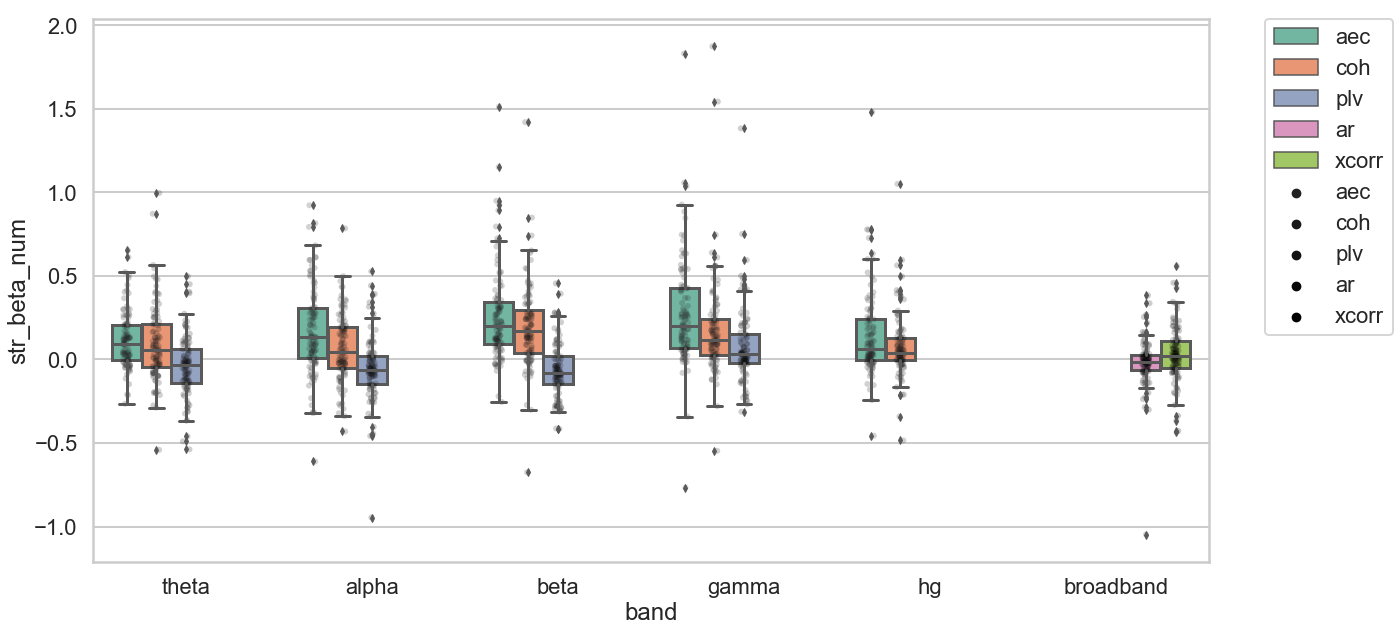

In [40]:
# color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')
    
plt.figure(figsize=(20,10))
sns.boxplot( data=net_data, x="band", y='str_beta_num', hue='fc_measure',
           order=['theta','alpha','beta','gamma','hg','broadband'])
sns.stripplot( data=net_data, x="band", y='str_beta_num',hue='fc_measure',color='black',jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("../img/net_num_str.eps")

Is it different within or outside of the SOZ?

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


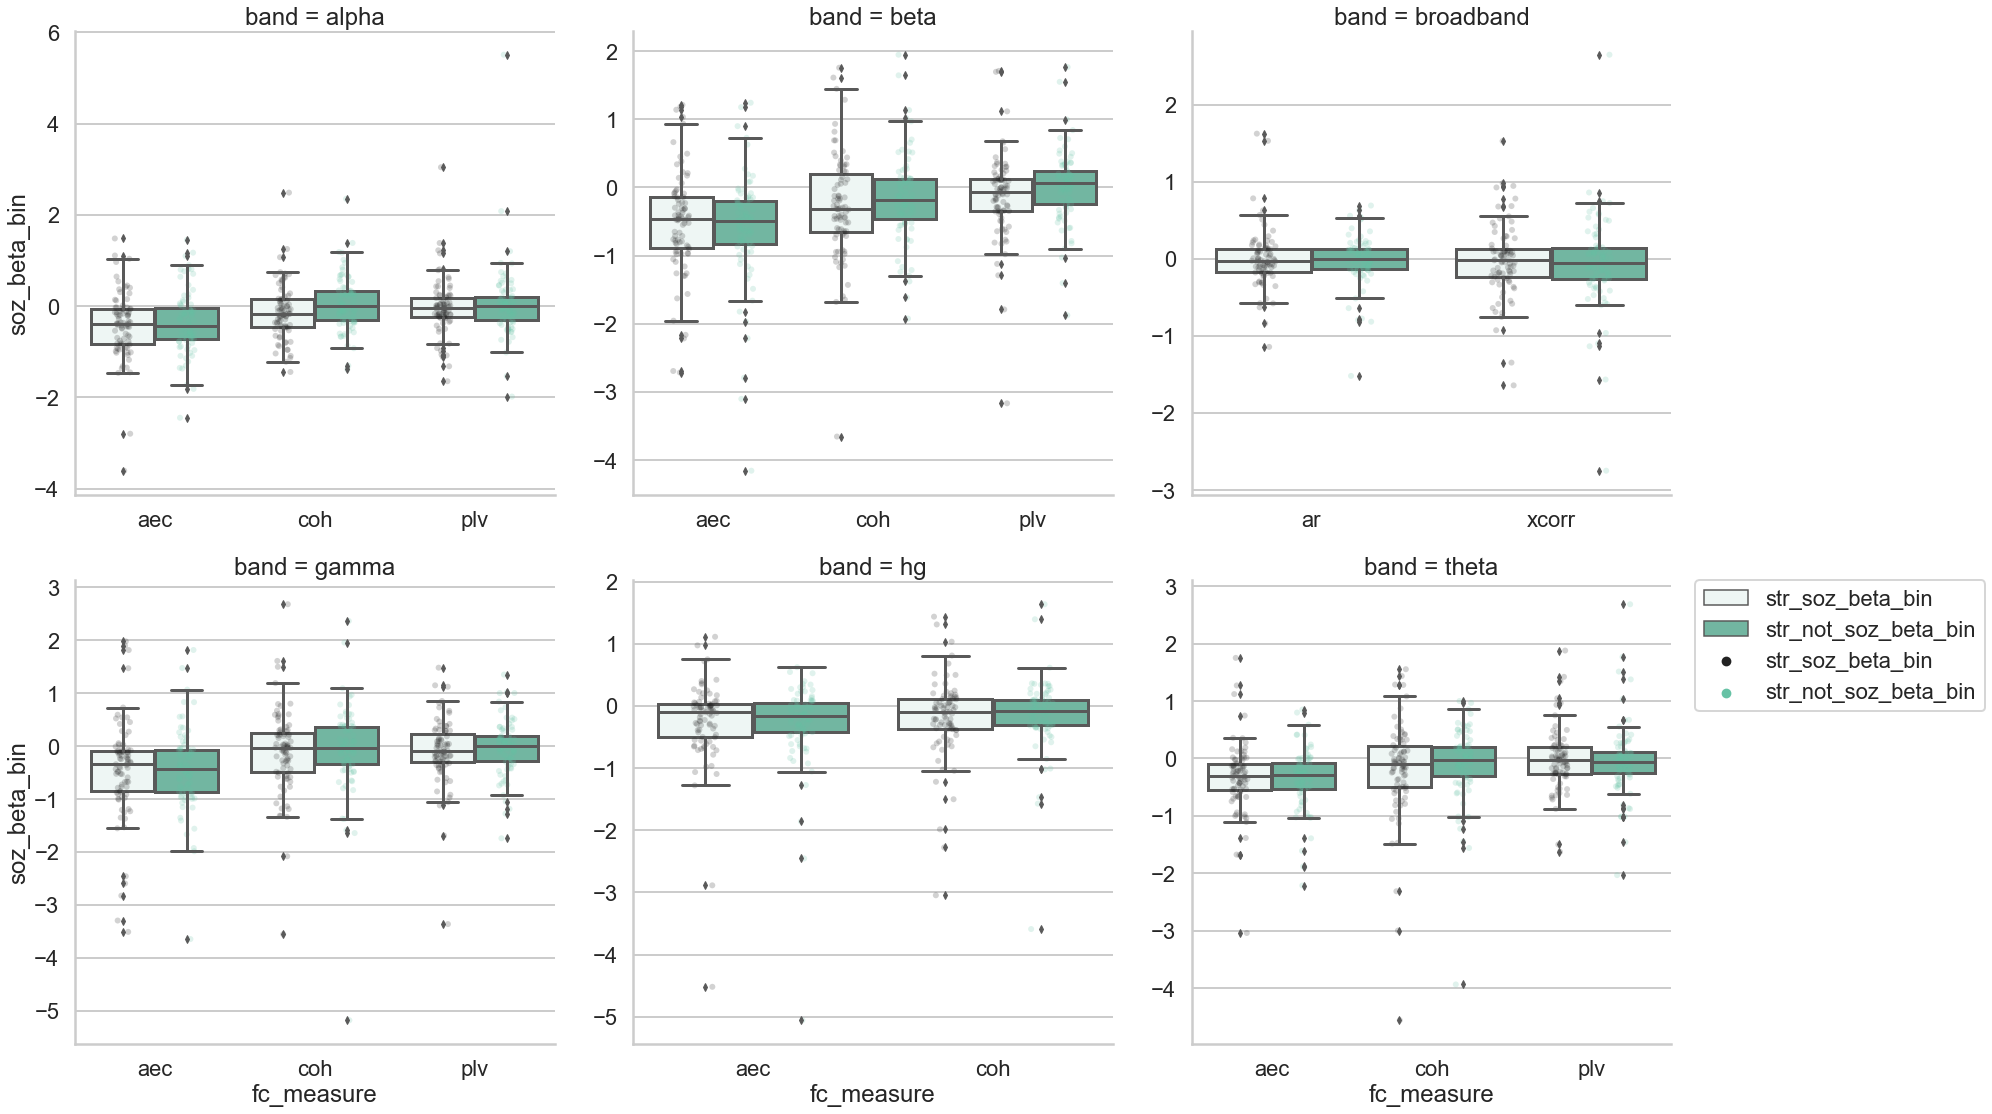

In [20]:
# reshape data
soz_net_data_bin = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj'], 
                           value_vars =['str_soz_beta_bin','str_not_soz_beta_bin'],  
                           var_name ='SOZ', value_name ='soz_beta_bin')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')
    
g = sns.FacetGrid(data=soz_net_data_bin, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, palette = custom_palette, height=8)
g.map(sns.boxplot, 'fc_measure', 'soz_beta_bin', 'SOZ', hue_order=['str_soz_beta_bin','str_not_soz_beta_bin'])
g.map(sns.stripplot, 'fc_measure', 'soz_beta_bin', 'SOZ',jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6, hue_order=['str_soz_beta_bin','str_not_soz_beta_bin'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_soz_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


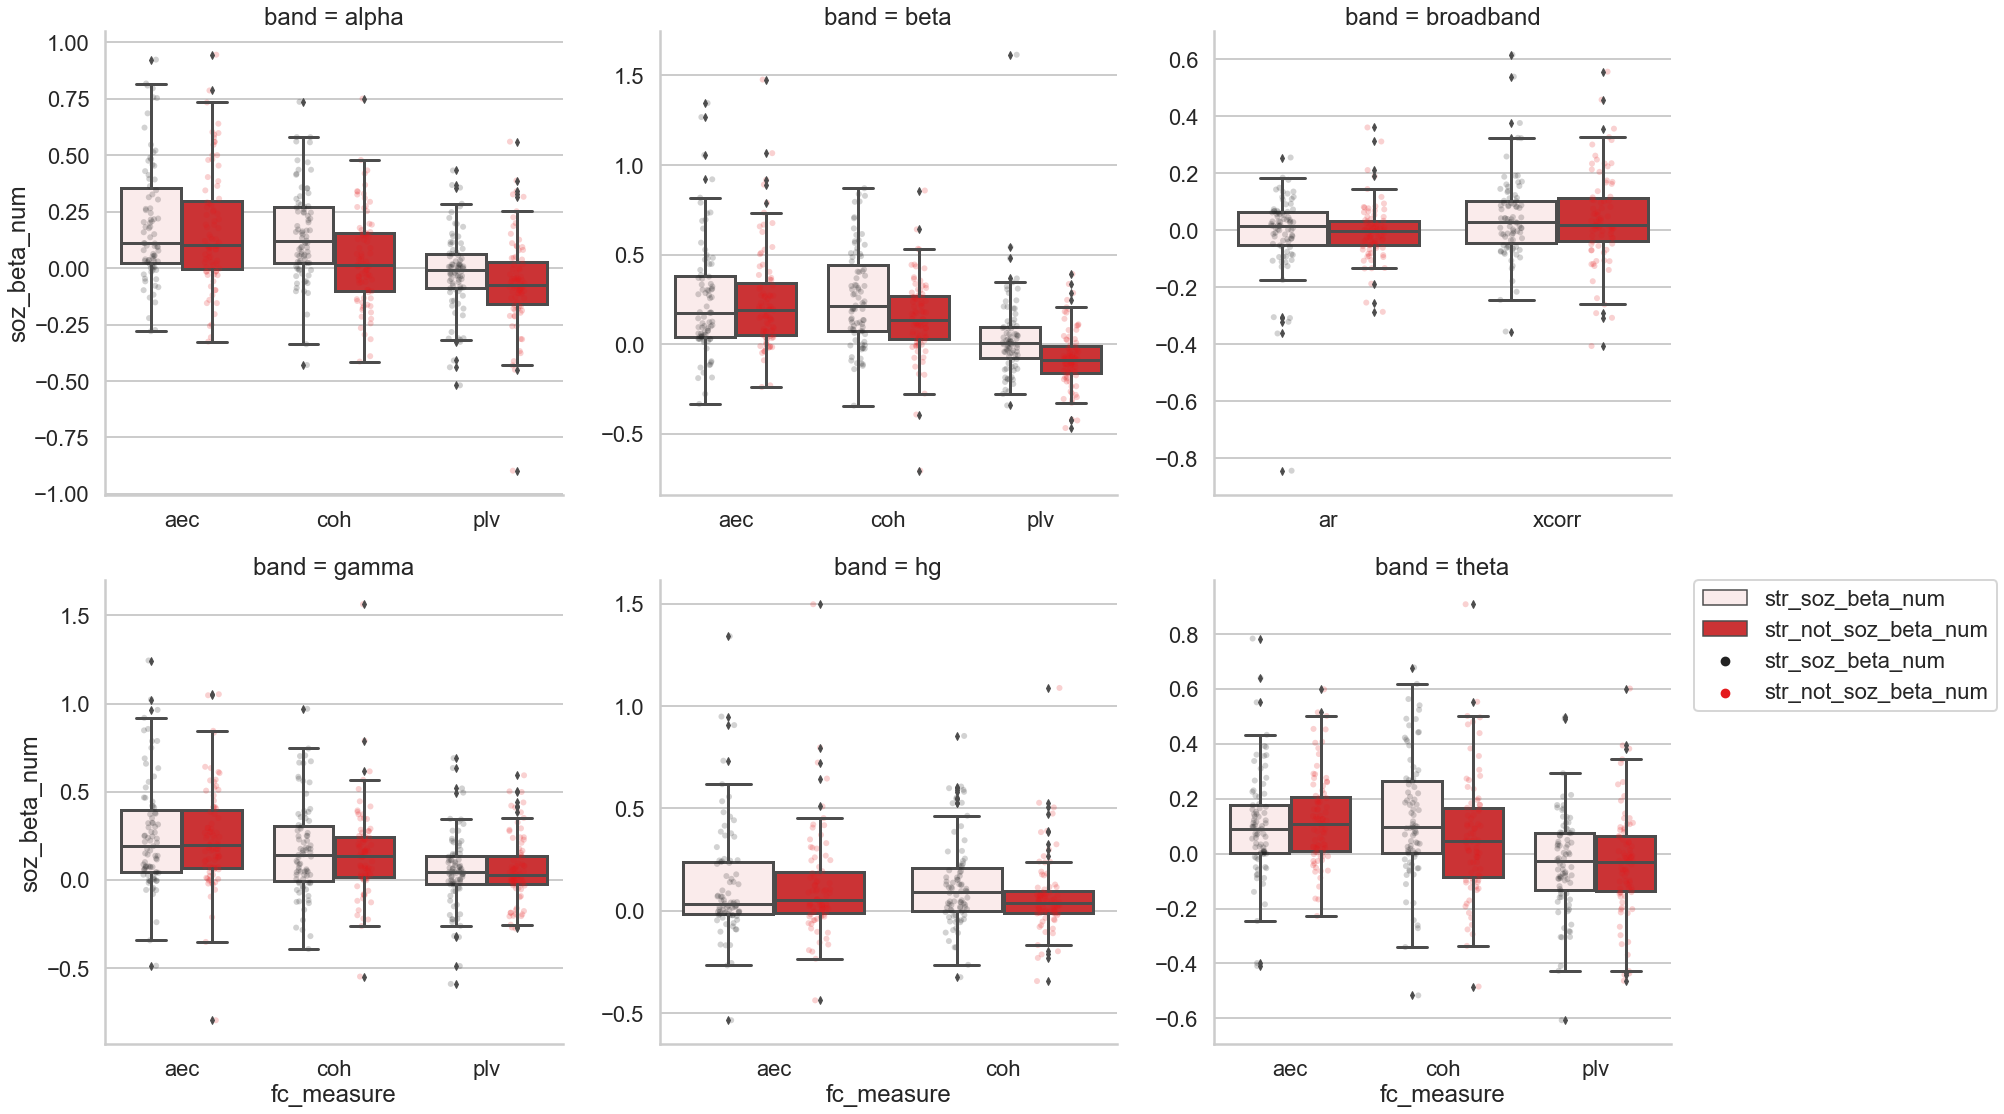

In [21]:
# reshape data
soz_net_data_num = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj'], value_vars =['str_soz_beta_num','str_not_soz_beta_num'],  var_name ='SOZ', value_name ='soz_beta_num')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set1')
    
g = sns.FacetGrid(data=soz_net_data_num, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, palette = custom_palette, height=8)
g.map(sns.boxplot, 'fc_measure', 'soz_beta_num', 'SOZ', hue_order=['str_soz_beta_num','str_not_soz_beta_num'])
g.map(sns.stripplot, 'fc_measure', 'soz_beta_num', 'SOZ',jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6, hue_order=['str_soz_beta_num','str_not_soz_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_num.eps")

Repeat for spikes

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


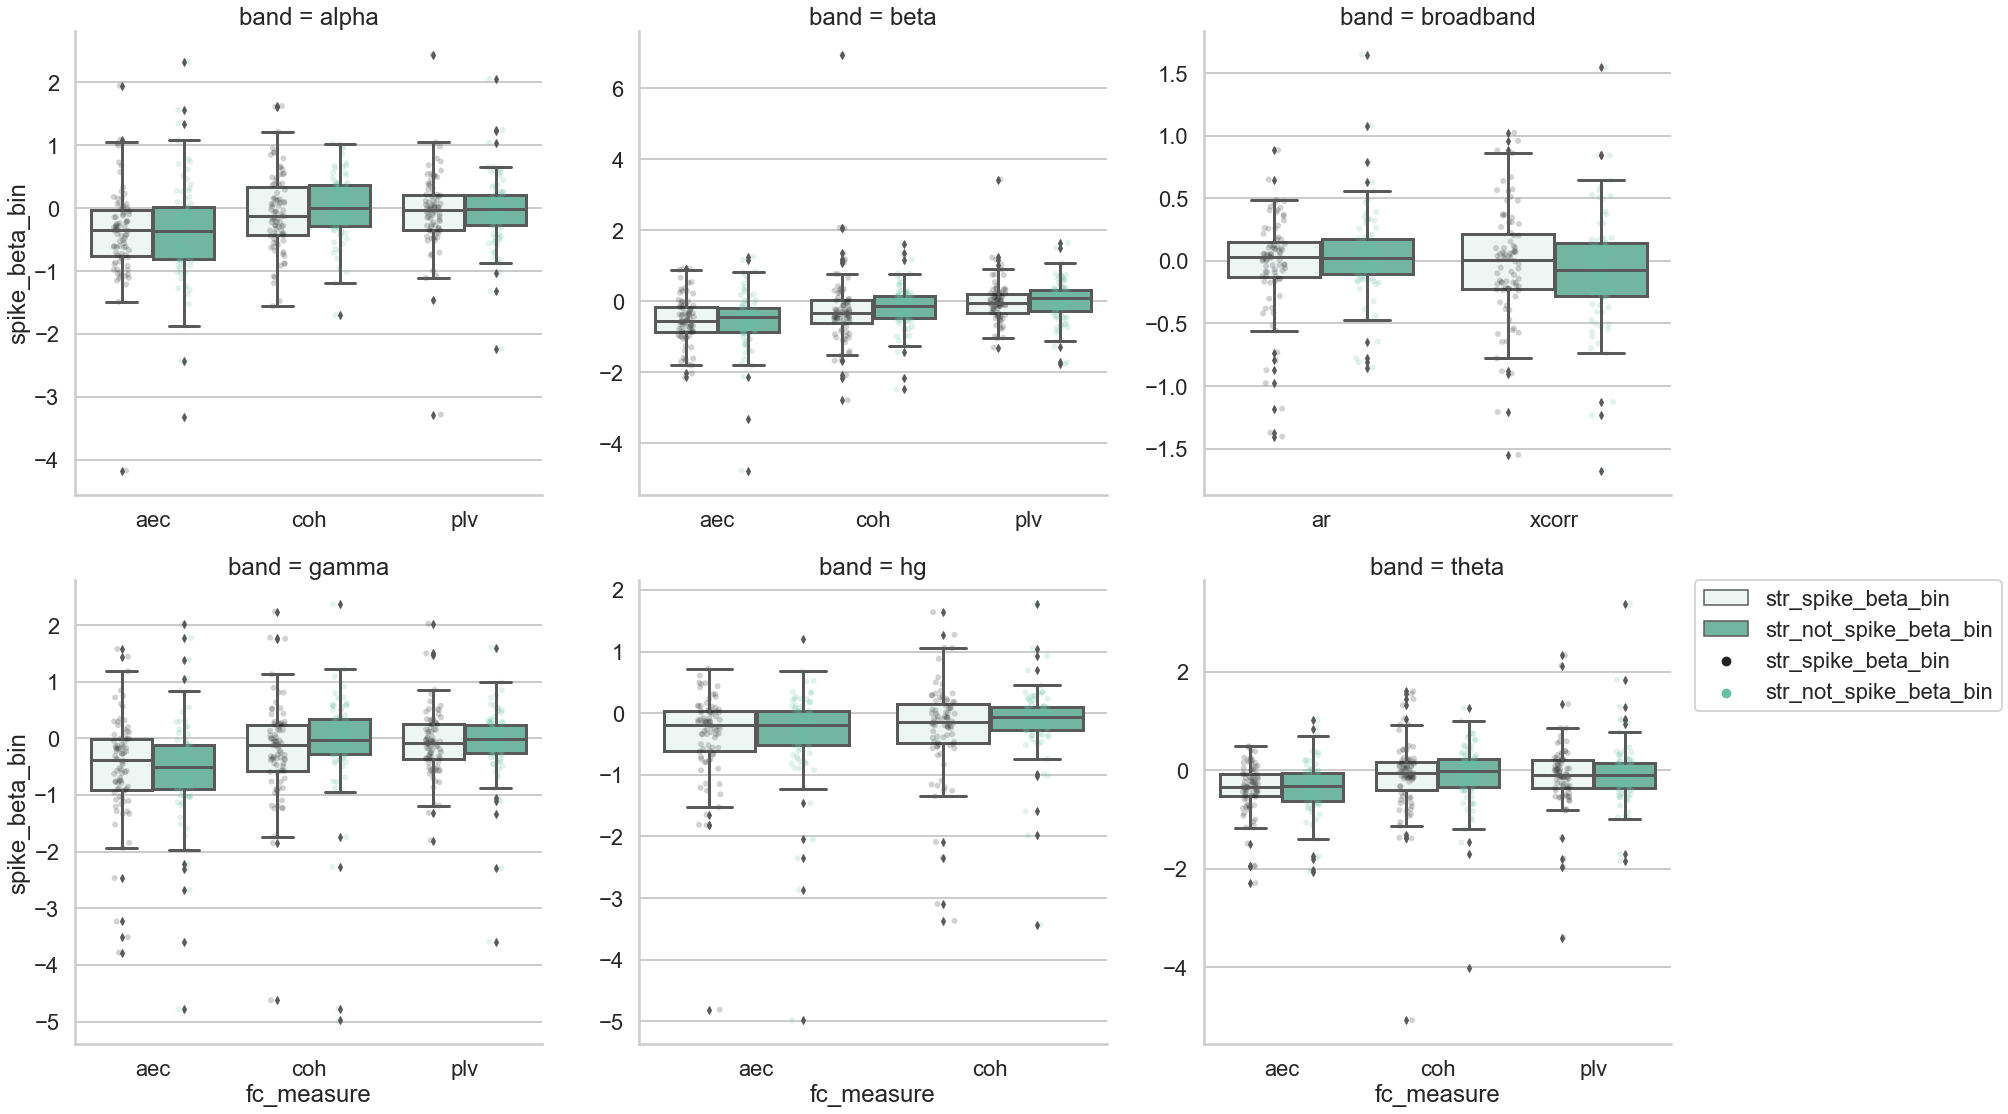

In [22]:
# reshape data
spike_net_data_bin = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj'], 
                             value_vars =['str_spike_beta_bin','str_not_spike_beta_bin'],  
                             var_name ='spike', value_name ='spike_beta_bin')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')
    
g = sns.FacetGrid(data=spike_net_data_bin, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, palette = custom_palette, height=8)
g.map(sns.boxplot, 'fc_measure', 'spike_beta_bin', 'spike', hue_order=['str_spike_beta_bin','str_not_spike_beta_bin'])
g.map(sns.stripplot, 'fc_measure', 'spike_beta_bin', 'spike',jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_bin','str_not_spike_beta_bin'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_spike_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


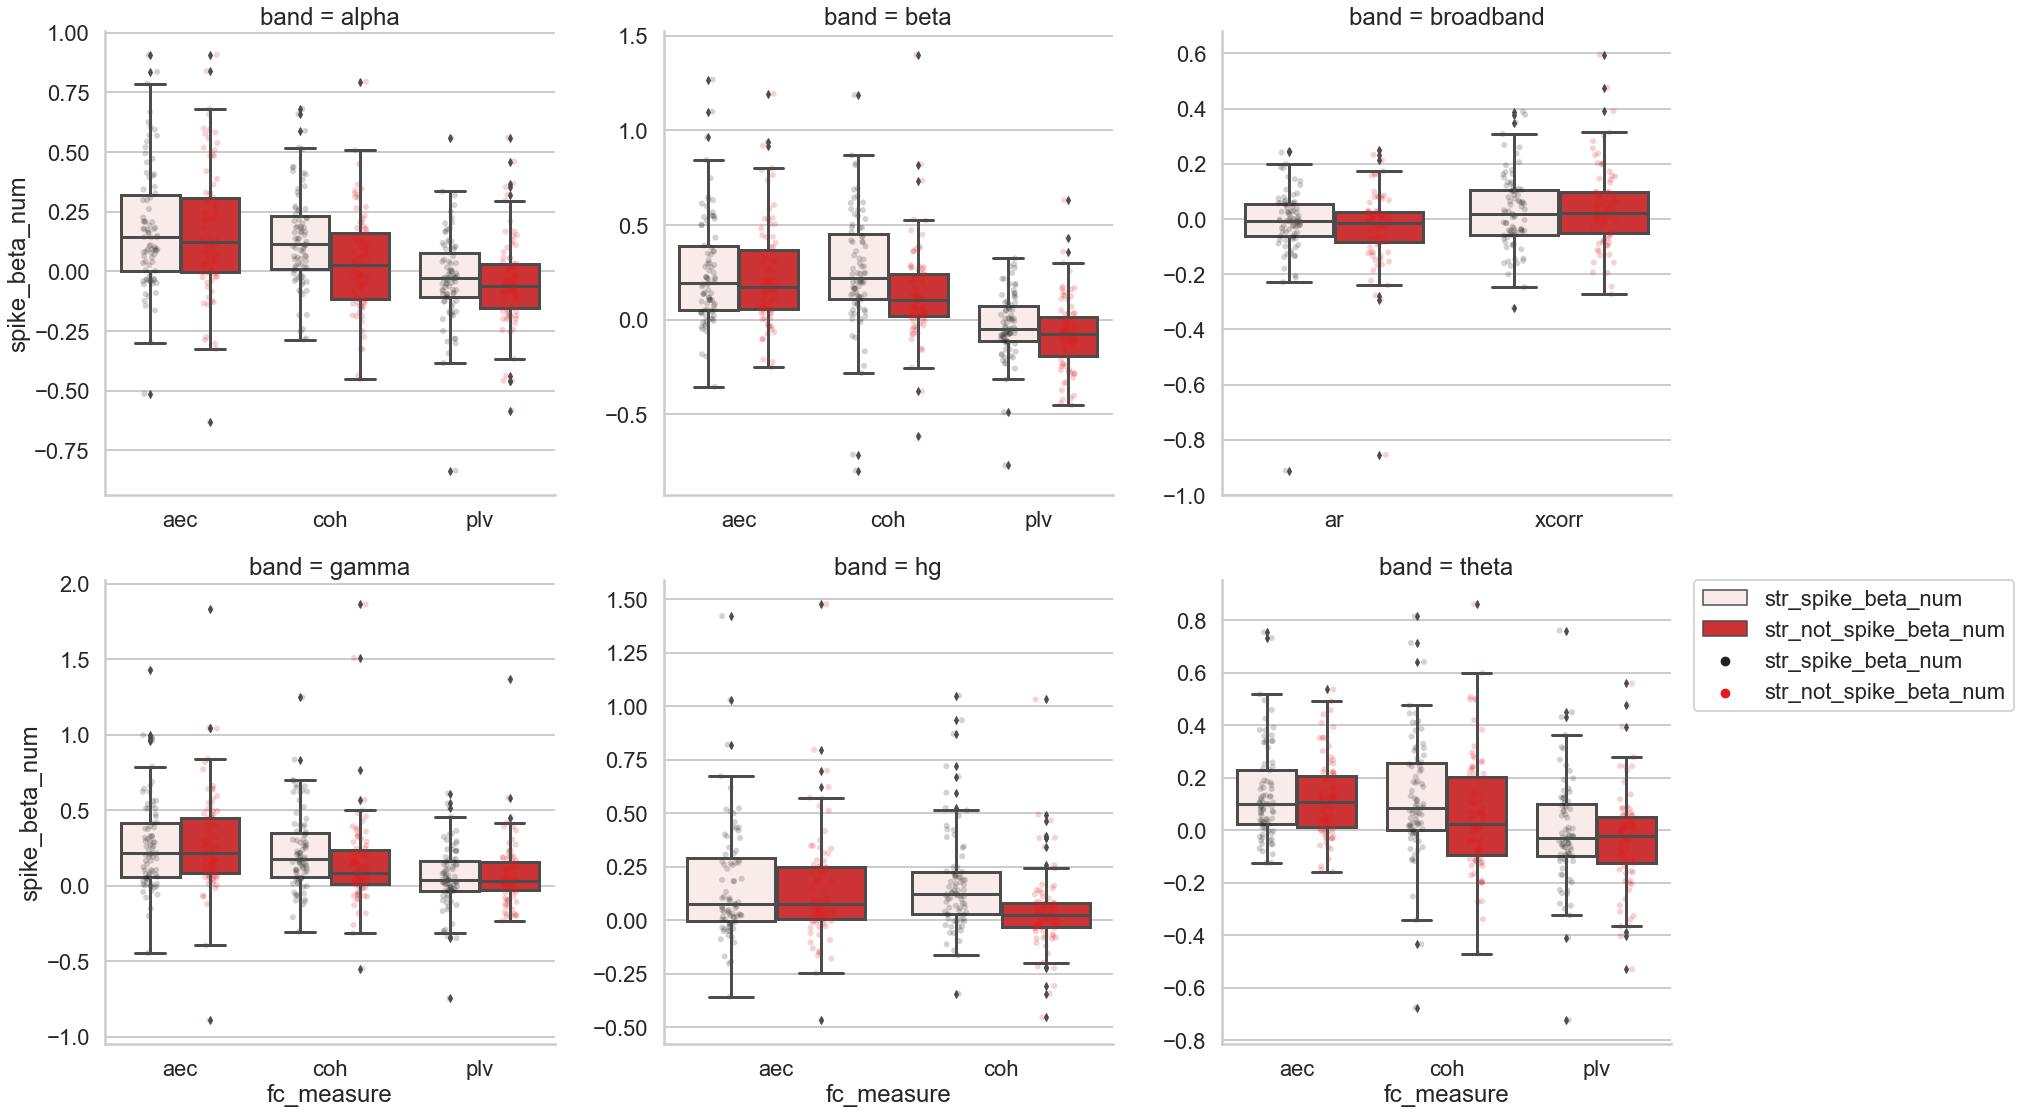

In [23]:
# reshape data
spike_net_data_bin = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj'], 
                             value_vars =['str_spike_beta_num','str_not_spike_beta_num'],  
                             var_name ='spike', value_name ='spike_beta_num')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set1')
    
g = sns.FacetGrid(data=spike_net_data_bin, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, palette = custom_palette, height=8)
g.map(sns.boxplot, 'fc_measure', 'spike_beta_num', 'spike', hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
g.map(sns.stripplot, 'fc_measure', 'spike_beta_num', 'spike',jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_spike_num.eps")

## Effects on Node Measures

relationship between the number of spikes seen in that node, and the beta value

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


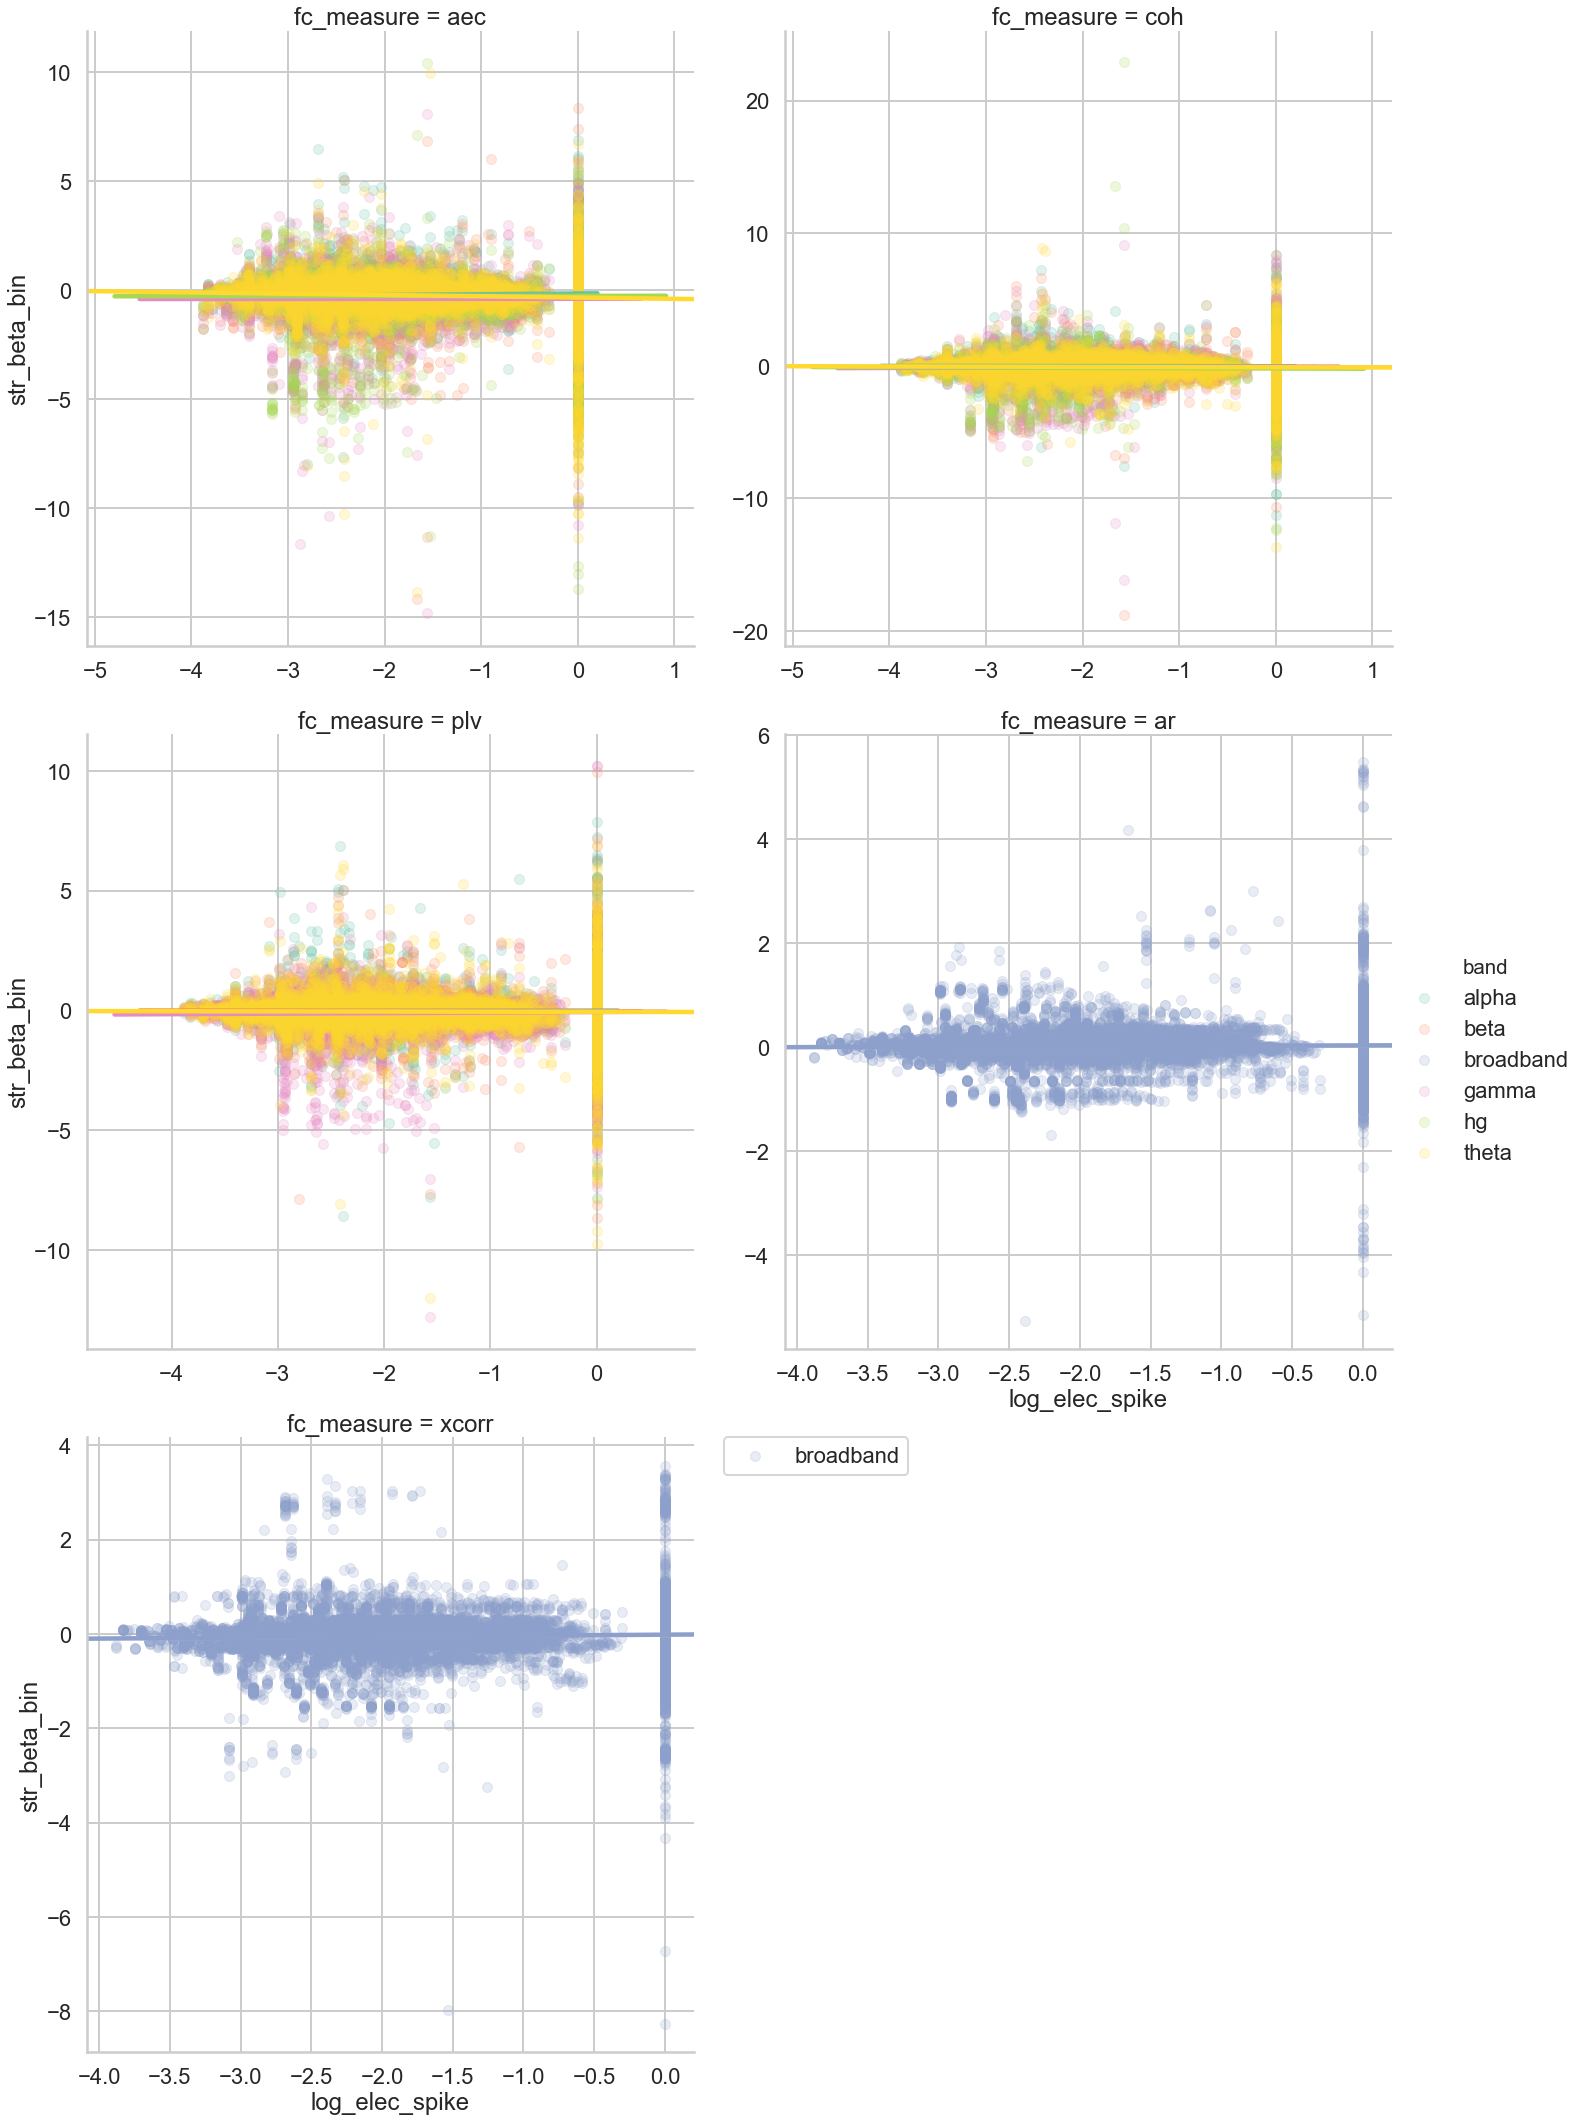

In [24]:
# add log transform
log_spike = np.zeros(np.shape(node_data['elec_spike']))
log_spike[[node_data['elec_spike'] != 0]] = np.log10(node_data['elec_spike'][node_data['elec_spike'] != 0])
node_data['log_elec_spike'] = log_spike

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')

#plt.figure(figsize=(40,20))
sns.lmplot(data=node_data, x='log_elec_spike', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=2, height=10, sharex=False, sharey=False, scatter_kws={'s':100, 'alpha':.2})

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


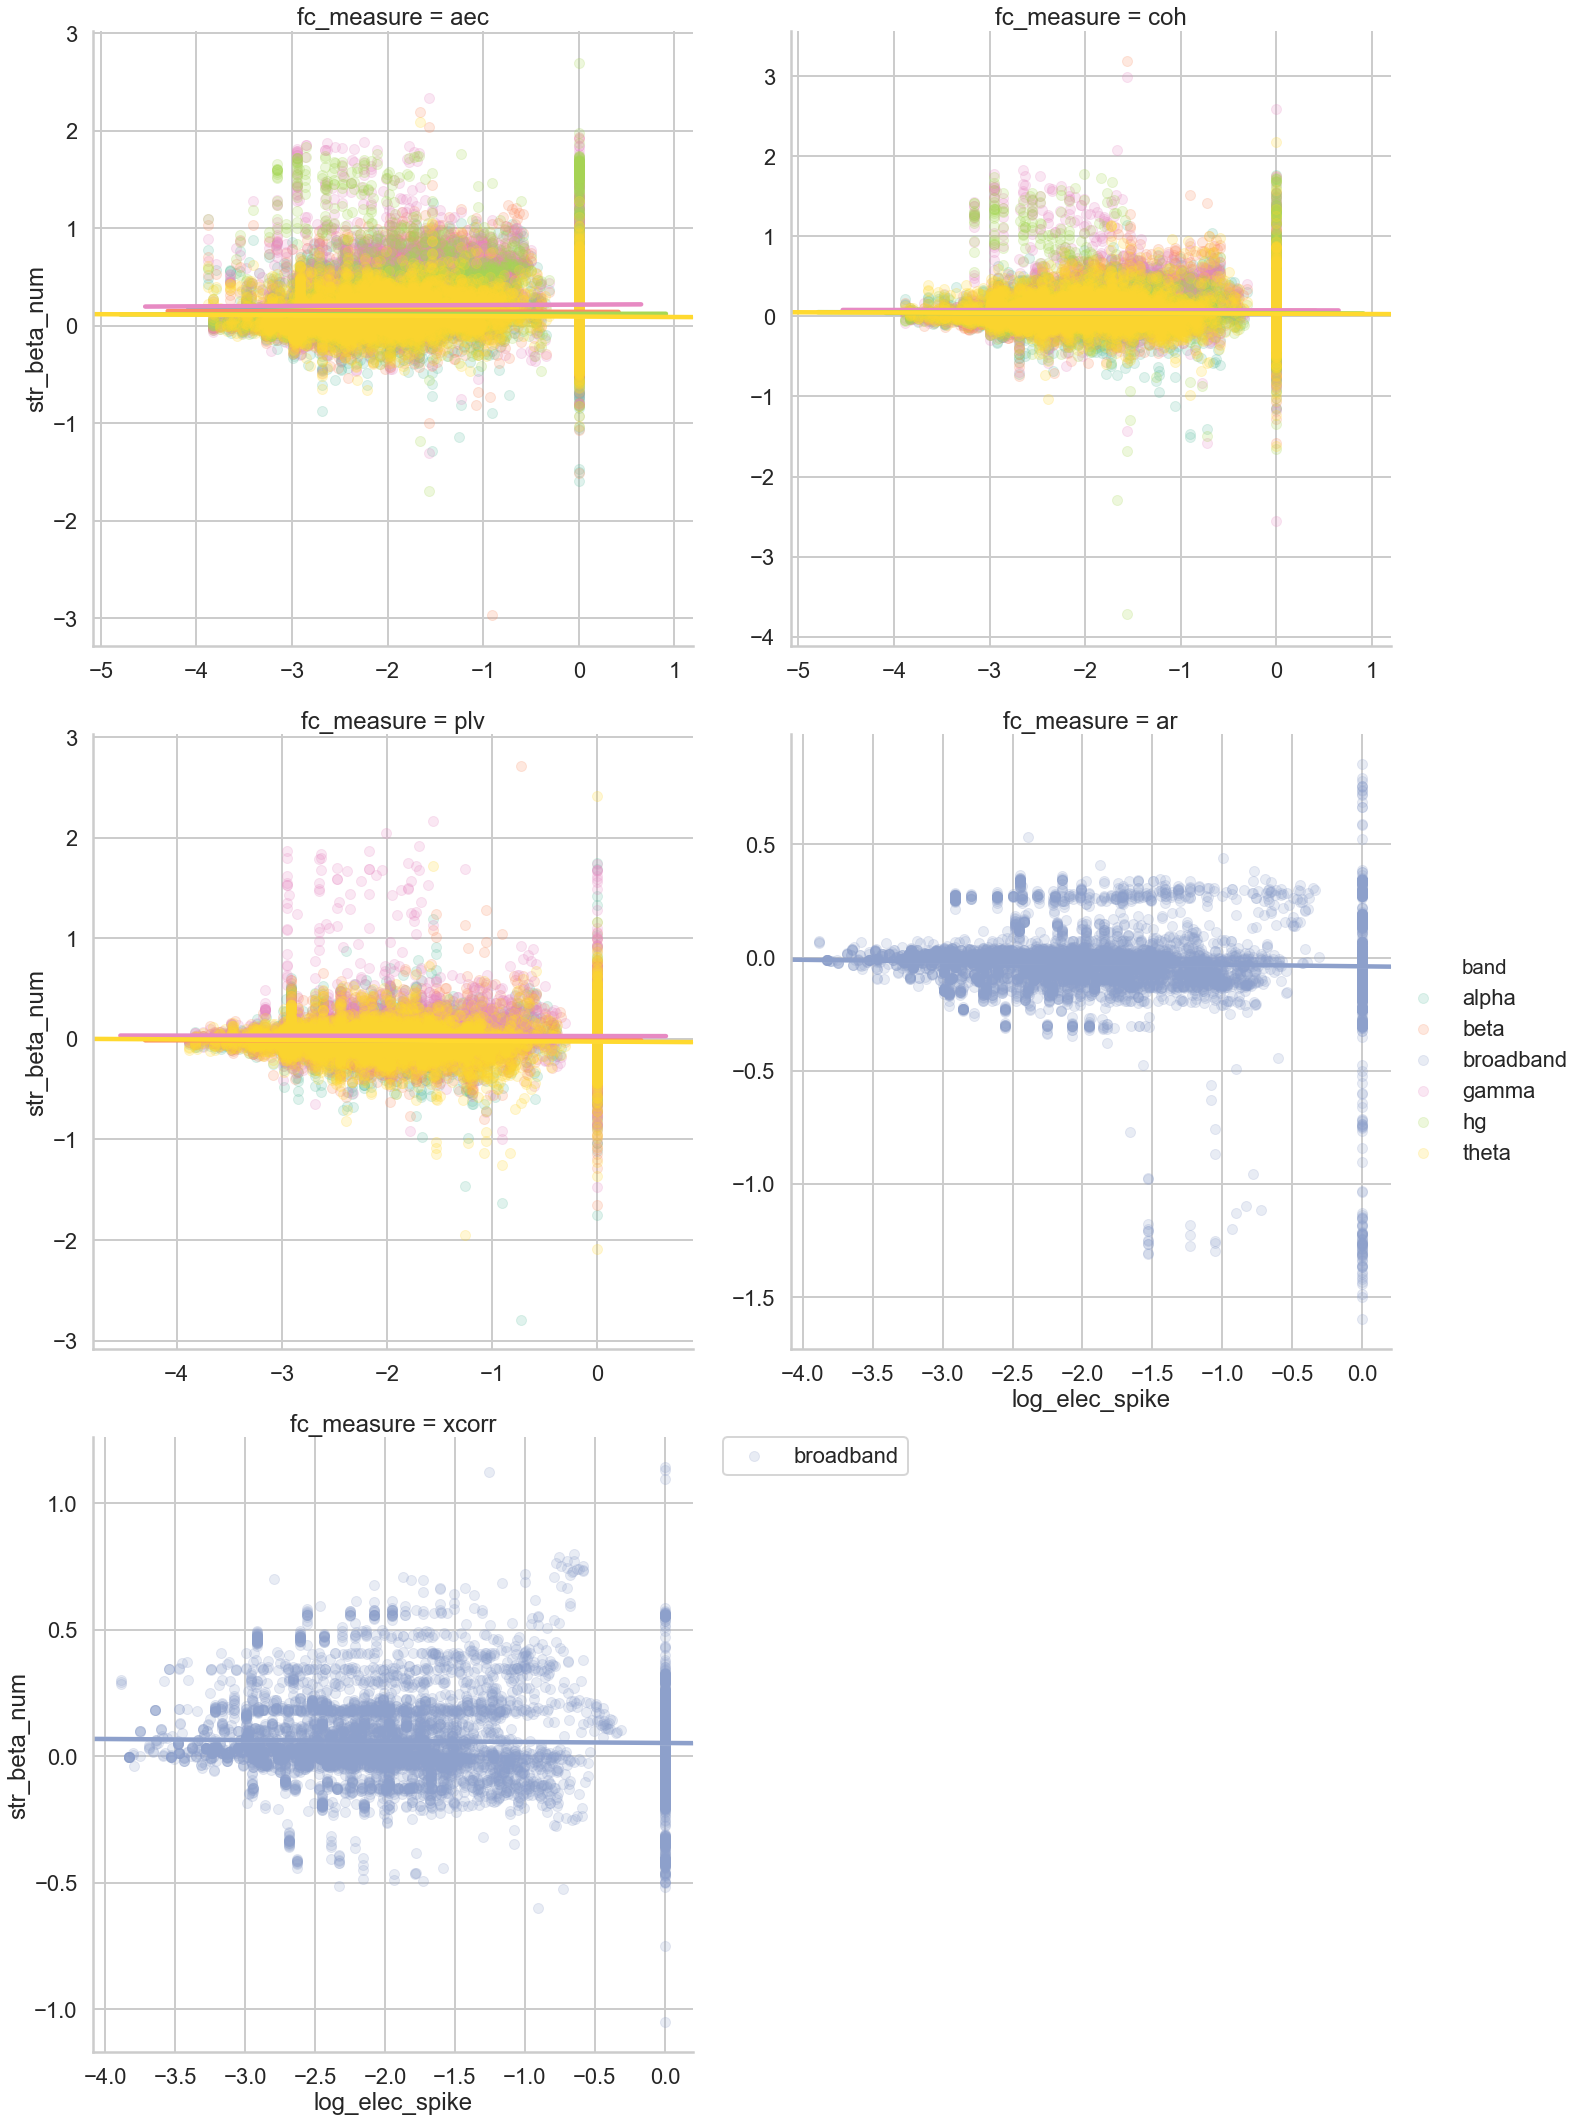

In [132]:
# add log transform
log_spike = np.zeros(np.shape(node_data['elec_spike']))
log_spike[[node_data['elec_spike'] != 0]] = np.log10(node_data['elec_spike'][node_data['elec_spike'] != 0])
node_data['log_elec_spike'] = log_spike

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')

#plt.figure(figsize=(40,20))
sns.lmplot(data=node_data, x='log_elec_spike', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=2, height=10, sharex=False, sharey=False, robust=True, scatter_kws={'s':100, 'alpha':.2})

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    

Total strength

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


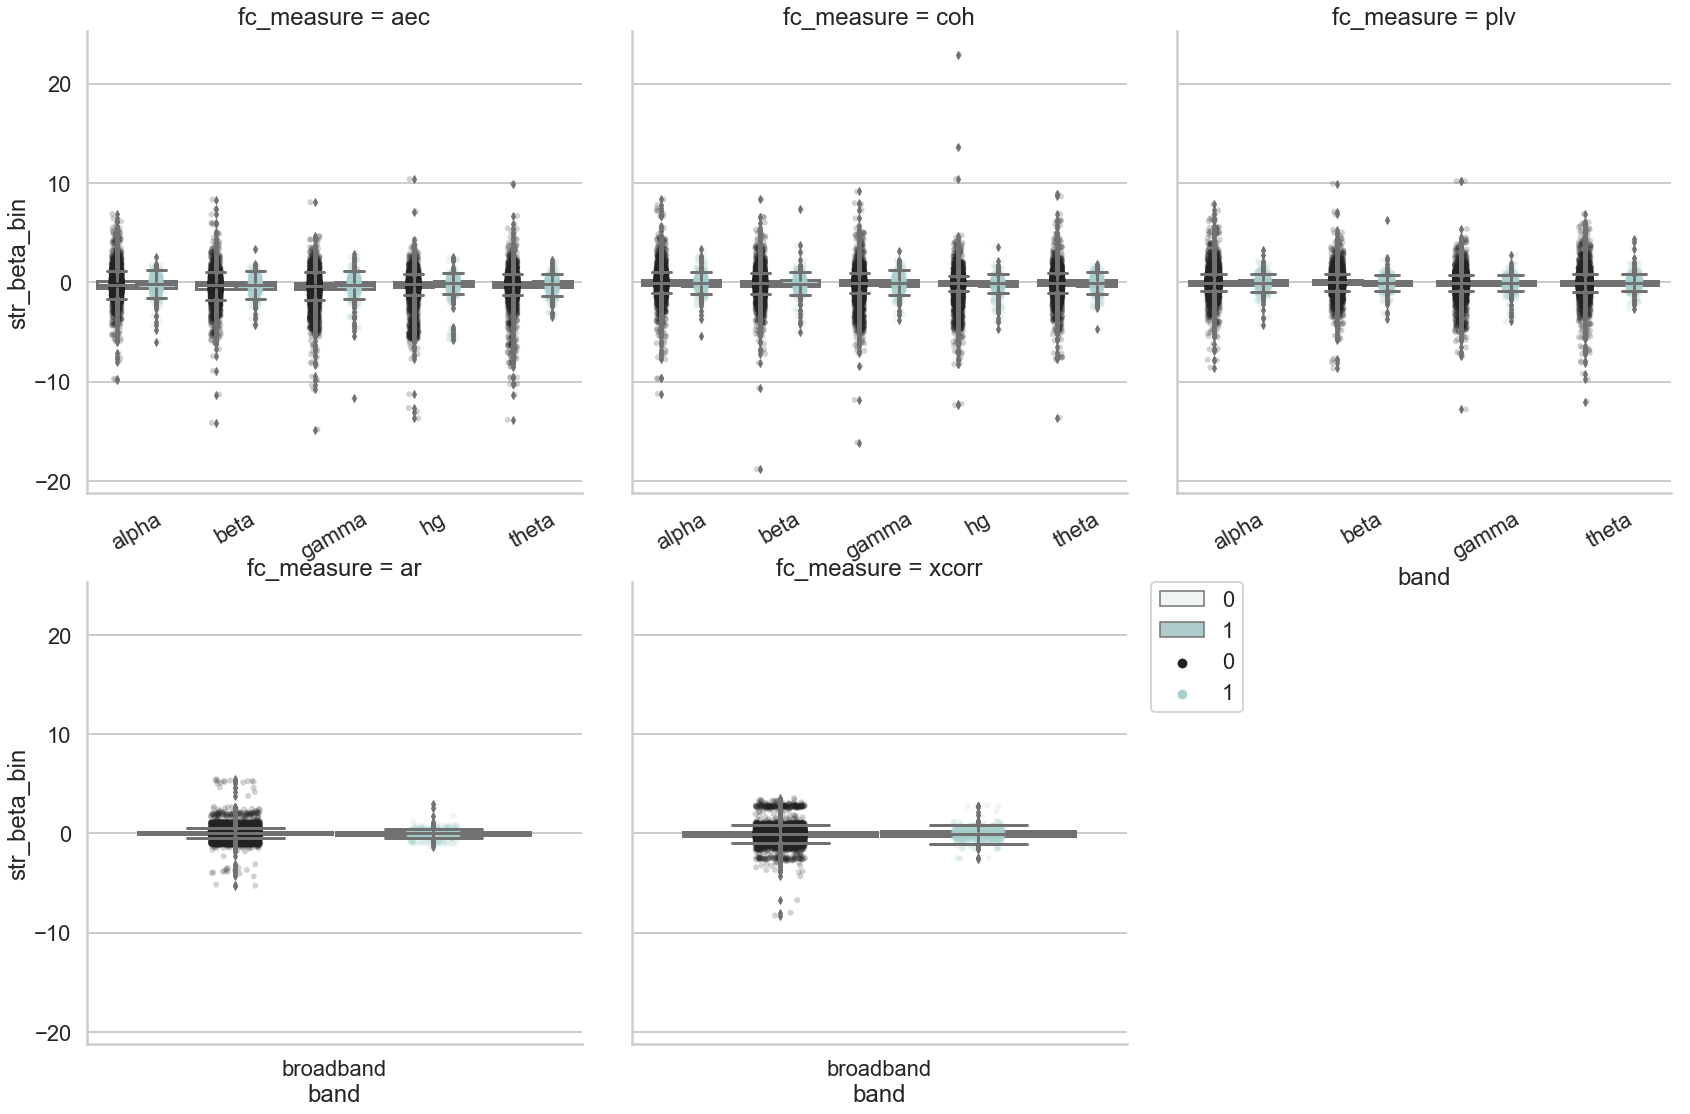

In [25]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'band', 'str_beta_bin', 'elec_in_soz', hue_order = [0, 1])
g.map(sns.stripplot, 'band', 'str_beta_bin', 'elec_in_soz', hue_order = [0,1], jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


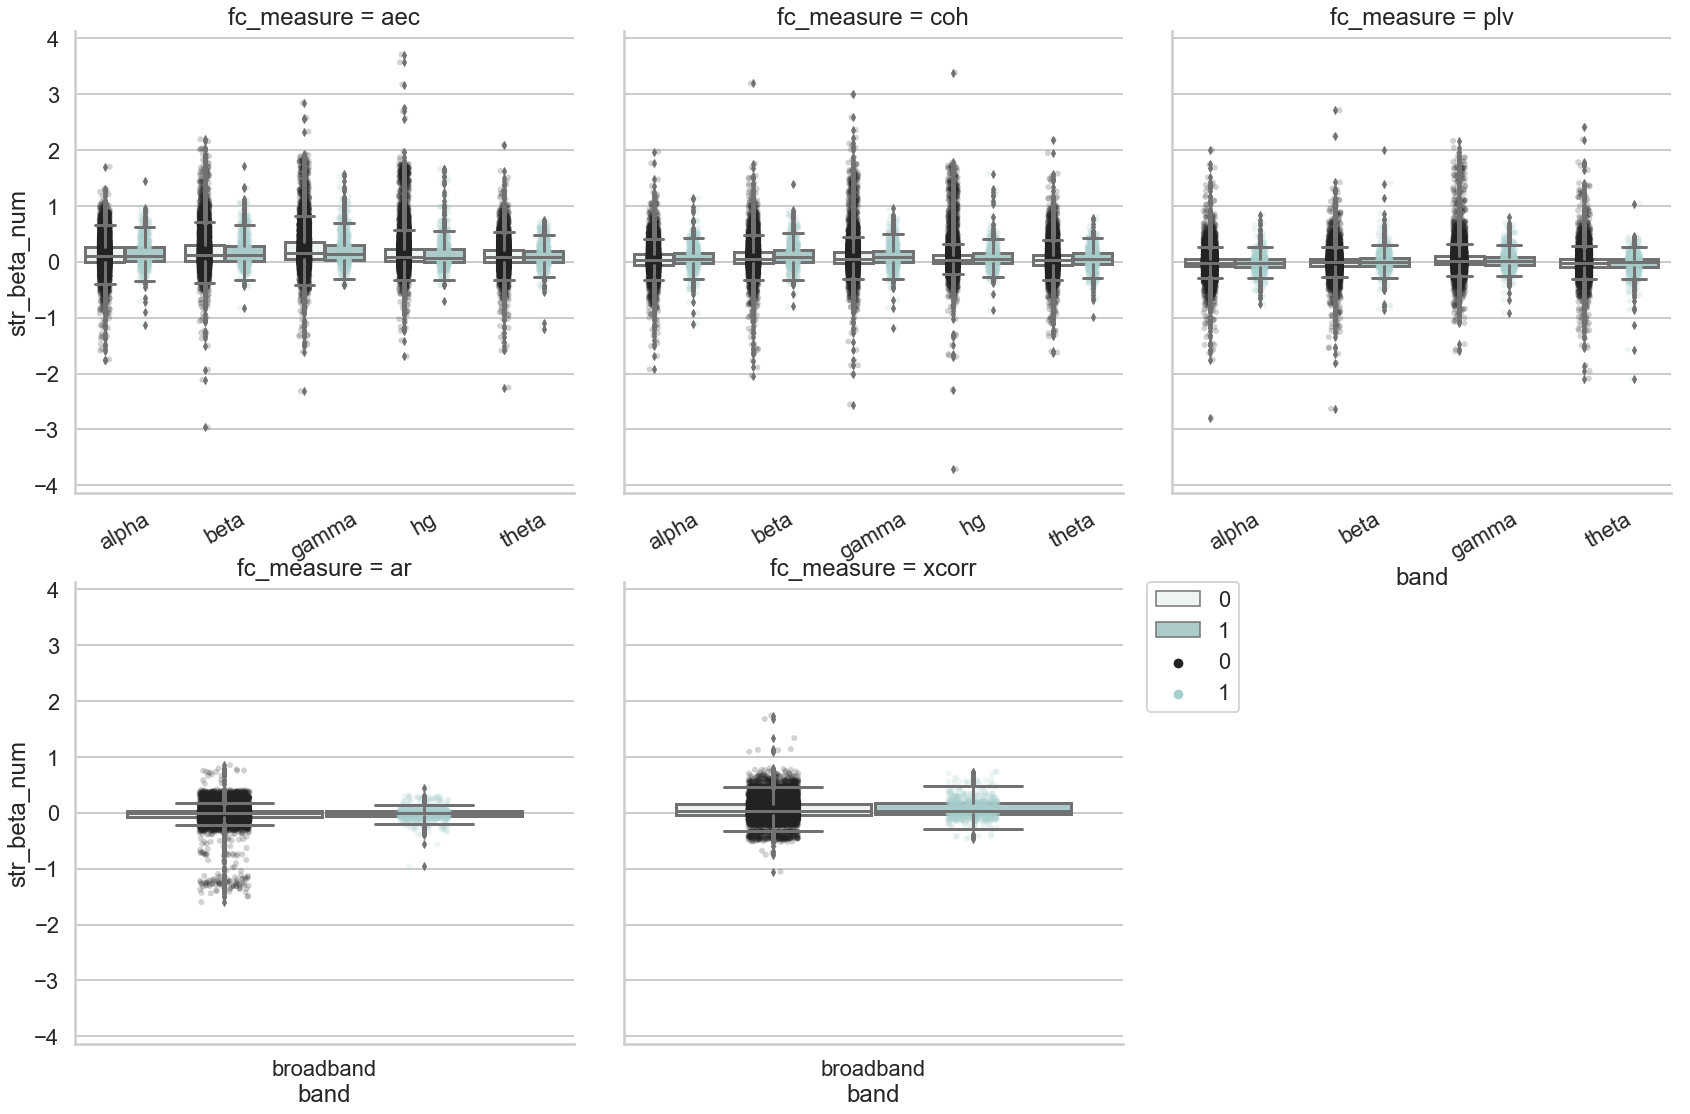

In [26]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'band', 'str_beta_num', 'elec_in_soz', hue_order = [0, 1])
g.map(sns.stripplot, 'band', 'str_beta_num', 'elec_in_soz', hue_order = [0,1], jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

### Categorize SOZ

In [27]:
temporal = ['lingual', 'bankssts', 'temp', 'hippo', 'rhin', 'fusiform']
frontal = ['front']

In [28]:
# check labels of elecs in soz. Mark as TLE if they contain temporal, 
# and FLE if frontal...for noww. would be better to have clinical 
# labels

epilepsy_type = pd.DataFrame(data={'subj':node_data.subj.unique(), 
                                   'locus':np.empty(node_data.subj.unique().shape)})
for index,row in epilepsy_type.iterrows():
    curr = node_data[node_data['subj'] == row.subj][node_data['elec_in_soz'] == 1]
    tle = [];
    fle = [];
    regions = curr.region.unique()
    for v in regions:
        if type(v) == str:
            tle.append(any([i in v for i in temporal]))
            fle.append(any([i in v for i in frontal]))
    if any(tle) and not any(fle):
        epilepsy_type.loc[index, 'locus'] = 'tle'
    elif any(fle) and not any(tle):
        epilepsy_type.loc[index, 'locus'] = 'fle'
    else:
        epilepsy_type.loc[index,'locus'] = 'amb'
    
epilepsy_type.head()           

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


subj locus
0  R1125T   amb
1  R1124J   tle
2  R1123C   amb
3  R1121M   amb
4  R1119P   amb

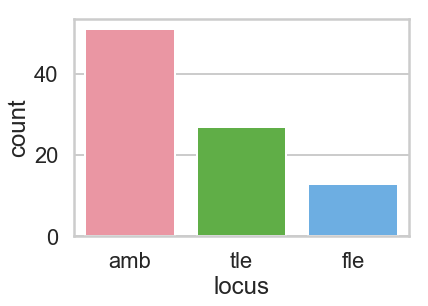

In [29]:
sns.countplot(data=epilepsy_type, x='locus')

In [30]:
# add locus back to big data frames
net_data = pd.merge(net_data, epilepsy_type, on='subj')
node_data = pd.merge(node_data, epilepsy_type, on='subj')
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1663
Data columns (total 20 columns):
band_measure              1664 non-null object
n_tp                      1664 non-null int64
str_beta_bin              1664 non-null float64
str_beta_num              1664 non-null float64
str_soz_beta_bin          1328 non-null float64
str_soz_beta_num          1328 non-null float64
str_not_soz_beta_num      1326 non-null float64
str_spike_beta_num        1328 non-null float64
str_not_soz_beta_bin      1326 non-null float64
str_spike_beta_bin        1328 non-null float64
str_not_spike_beta_bin    1322 non-null float64
fc_measure                1664 non-null object
str_not_spike_beta_num    1322 non-null float64
band                      1664 non-null object
subj                      1664 non-null object
hand                      1664 non-null object
age                       1664 non-null float64
gender                    1664 non-null object
race                      1664 non-nu

In [31]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167456 entries, 0 to 167455
Data columns (total 28 columns):
elec                      167456 non-null object
band_measure              167456 non-null object
n_tp                      167456 non-null int64
elec_spike                167456 non-null float64
elec_in_soz               167456 non-null int64
str_soz_beta_bin          133152 non-null float64
str_not_soz_beta_bin      122604 non-null float64
str_spike_beta_bin        133008 non-null float64
str_not_spike_beta_bin    117786 non-null float64
str_beta_bin              167328 non-null float64
str_soz_beta_num          133152 non-null float64
str_not_soz_beta_num      122604 non-null float64
str_spike_beta_num        133008 non-null float64
str_beta_num              167328 non-null float64
str_not_spike_beta_num    117786 non-null float64
fc_measure                167456 non-null object
band                      167456 non-null object
region                    153072 non-null objec

## Net plots with category by locus

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


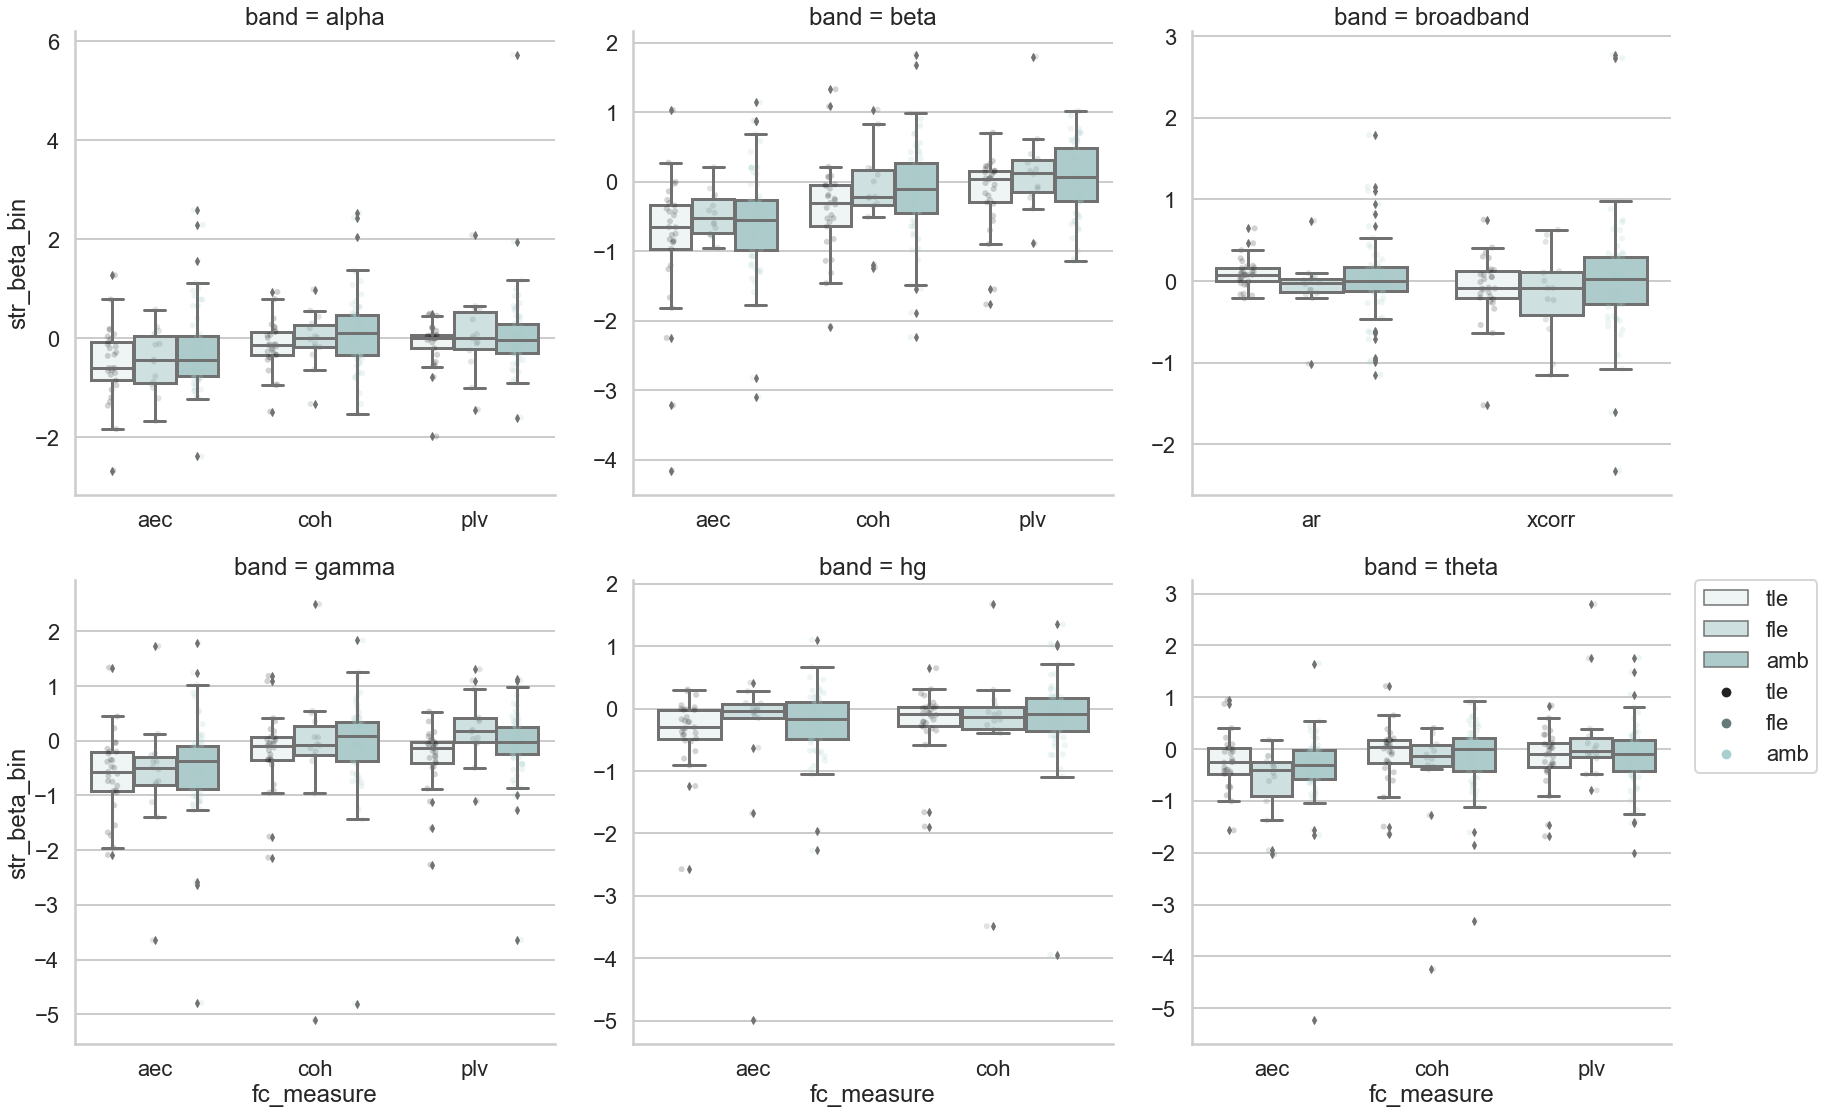

In [34]:
# grand teton palette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))

g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'fc_measure', 'str_beta_bin', 'locus', hue_order = ['tle','fle','amb'])
g.map(sns.stripplot, 'fc_measure', 'str_beta_bin', 'locus', hue_order = ['tle','fle','amb'],jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-5,5)
    
#g.savefig("../img/net_num.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


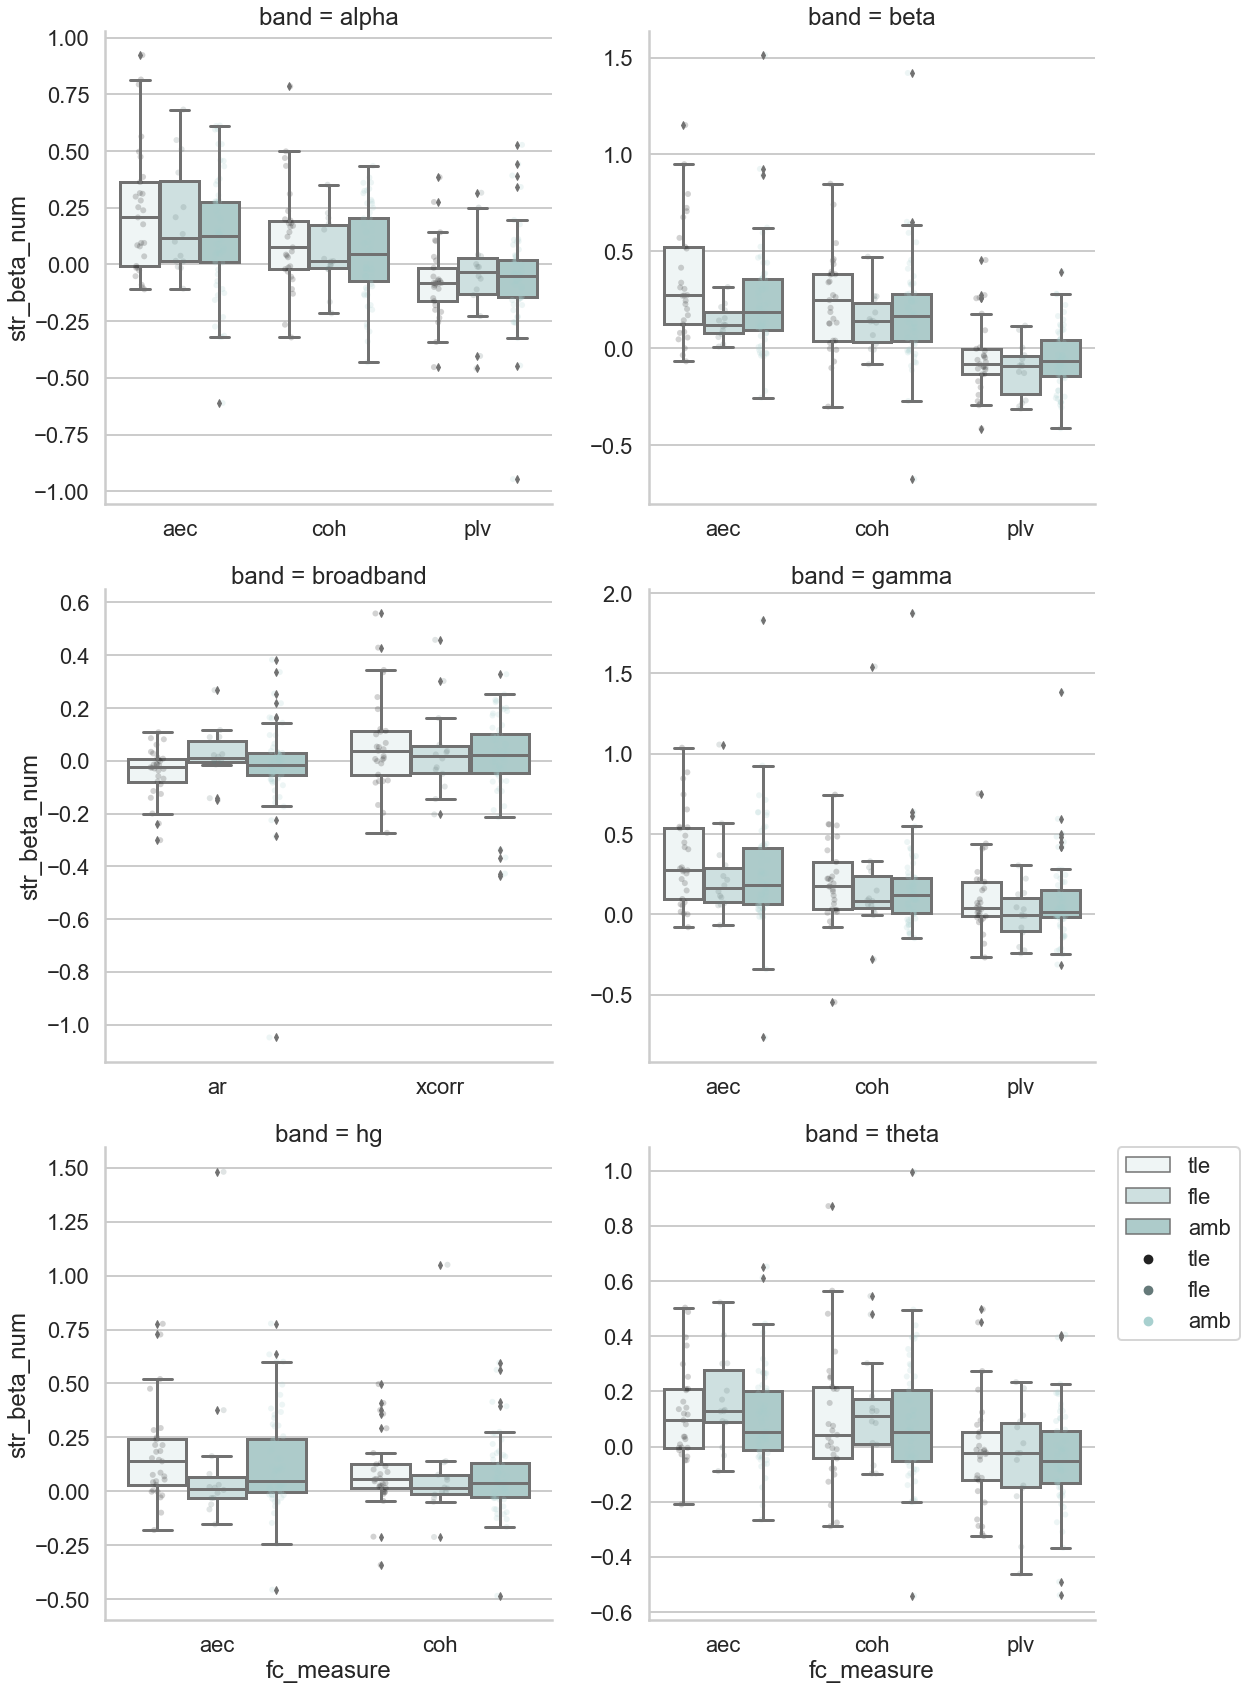

In [37]:
g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 2, 
                  sharex=False, sharey=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'fc_measure', 'str_beta_num', 'locus', hue_order = ['tle','fle','amb'])
g.map(sns.stripplot, 'fc_measure', 'str_beta_num', 'locus', hue_order = ['tle','fle','amb'],jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_num.eps")